In [426]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta
from pandas.tseries.offsets import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
#from datetime import date

In [288]:
#Read in the file and do some preprocessing
date_cols = ['creation_time', 'last_session_creation_time']
df = pd.read_csv(r'relax_challenge/takehome_users.csv',dtype={'last_session_creation_time':str,'invited_by_user_id': str},encoding='latin-1', sep=',',parse_dates=date_cols)
#df2['last_session_creation_time'] = df2['last_session_creation_time'].astype('Int64')
#df2['last_session_creation_time'] = [int(x) for x in df2['last_session_creation_time']]
df['last_session_creation_time'] = [pd.to_datetime(x,unit='s') for x in df['last_session_creation_time']]
df['invited_by_user_id'] = df['invited_by_user_id'].fillna(99999)


display(df.head(9))
display(df.tail())
print(df.shape)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,99999
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,99999
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,99999


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,99999
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,99999
11999,12000,2014-01-26 08:57:12,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,2014-01-26 08:57:12,0,1,0,99999


(12000, 10)


In [250]:
#Creating a mini df that only has headers we will join in later

df['email_domain']=[row.split('@')[1] for row in df['email']]
df_mini = df[['object_id', 'creation_time', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id','email_domain']]

df_mini.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803,yahoo.com
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316,gustr.com
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525,gustr.com
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151,yahoo.com
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240,yahoo.com


In [307]:
print(df.columns)

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')


In [291]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null object
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 937.6+ KB


object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                    object
dtype: object

In [231]:
#Read in the file and bucket time stamps into week ending dates(the seven day period)

df2 = pd.read_csv(r'relax_challenge/takehome_user_engagement.csv',sep=',',parse_dates=True)
df2['time_stamp'] = [pd.to_datetime(x) for x in df2['time_stamp']]
df2['week_ending'] = [ x.date() + Week(weekday=5) for x in df2['time_stamp']]
#df2['WEEK ENDING'] = df2['time_stamp'].values.date() + Week(weekday=5)
#df2['weekending'] = df2['time_stamp'].apply(weekending)
df2.head(10)

,time_stamp,user_id,visited,week_ending
0,2014-04-22 03:53:30,1,1,2014-04-26
1,2013-11-15 03:45:04,2,1,2013-11-16
2,2013-11-29 03:45:04,2,1,2013-11-30
3,2013-12-09 03:45:04,2,1,2013-12-14
4,2013-12-25 03:45:04,2,1,2013-12-28
5,2013-12-31 03:45:04,2,1,2014-01-04
6,2014-01-08 03:45:04,2,1,2014-01-11
7,2014-02-03 03:45:04,2,1,2014-02-08
8,2014-02-08 03:45:04,2,1,2014-02-15
9,2014-02-09 03:45:04,2,1,2014-02-15


In [232]:
#Inspection of a subset of data to check if the code is working

df2_search = df2.loc[df2['user_id']==2]
#df2_search = df2_search.set_index('time_stamp')
display(df2_search)
display(df2_search.shape)

,time_stamp,user_id,visited,week_ending
1,2013-11-15 03:45:04,2,1,2013-11-16
2,2013-11-29 03:45:04,2,1,2013-11-30
3,2013-12-09 03:45:04,2,1,2013-12-14
4,2013-12-25 03:45:04,2,1,2013-12-28
5,2013-12-31 03:45:04,2,1,2014-01-04
6,2014-01-08 03:45:04,2,1,2014-01-11
7,2014-02-03 03:45:04,2,1,2014-02-08
8,2014-02-08 03:45:04,2,1,2014-02-15
9,2014-02-09 03:45:04,2,1,2014-02-15
10,2014-02-13 03:45:04,2,1,2014-02-15


(14, 4)

In [255]:
#Group the data into week ending and user IDs as Active or not. 1 for Active 0 for not Active

#df2_search.resample?
group2 = df2.groupby(['week_ending', 'user_id'])['visited'].sum()
group2 = pd.DataFrame(group2)
group2.reset_index(inplace=True)
group2['Active'] = [1 if i >= 3 else 0 for i in group2['visited']]
#group2.columns = ['A']
display(group2.head())
display(group2.tail())
print(group2.shape)


,week_ending,user_id,visited,Active
0,2012-06-02,1693,1,0
1,2012-06-02,1995,1,0
2,2012-06-02,3428,1,0
3,2012-06-02,6102,1,0
4,2012-06-02,8068,1,0


,week_ending,user_id,visited,Active
68716,2014-06-07,11906,2,0
68717,2014-06-07,11924,5,1
68718,2014-06-07,11959,2,0
68719,2014-06-07,11967,1,0
68720,2014-06-07,11988,1,0


(68721, 4)


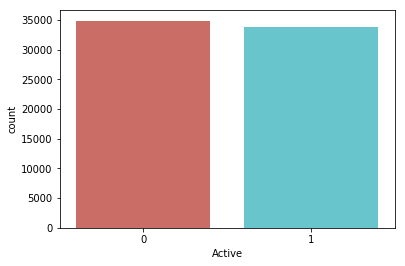

In [427]:
#Plot a count plot of Active vs non Active

sns.countplot(x='Active',data=group2, palette='hls')
plt.show()

In [319]:
#Join in columns from df_mini to be further processed

df3 = pd.merge(group2, df_mini, how='left',left_on=['user_id'],right_on=['object_id'])
df3['invited_by_user_id'] = [str(x) for x in df3['invited_by_user_id']]
print(df3.shape)
display(df3.head())
df3.info()

(68721, 13)


,week_ending,user_id,visited,Active,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
0,2012-06-02,1693,1,0,1693,2012-05-31 21:58:33,SIGNUP_GOOGLE_AUTH,2014-05-12 21:58:33,0,1,50,0,gmail.com
1,2012-06-02,1995,1,0,1995,2012-05-31 13:14:18,ORG_INVITE,2012-06-01 13:14:18,1,0,363,1995,hotmail.com
2,2012-06-02,3428,1,0,3428,2012-05-31 15:47:36,SIGNUP_GOOGLE_AUTH,2012-11-13 15:47:36,1,0,166,0,gmail.com
3,2012-06-02,6102,1,0,6102,2012-06-01 00:17:30,ORG_INVITE,2012-06-15 00:17:30,0,0,34,6102,gustr.com
4,2012-06-02,8068,1,0,8068,2012-06-01 20:02:35,ORG_INVITE,2014-05-29 20:02:35,0,1,42,8068,hotmail.com


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null object
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 937.6+ KB


In [320]:
#Create a list of columns for the dataframe columns that will be one hot encoded

#len(df2['last_session_creation_time'].unique())
#print(df.columns)
#print(df3['creation_source'].unique())
creation_source_list = list(df3['creation_source'].unique())
print(creation_source_list)
print()


org_id_list = list(df3['org_id'].unique())
org_id_list = [str(x) for x in org_id_list]
print(org_id_list[:5])

print()
#print(df3['invited_by_user_id'].unique())
invited_by_user_id_list = list(df3['invited_by_user_id'].unique())
invited_by_user_id_list = [str(x) for x in invited_by_user_id_list]
print(invited_by_user_id_list[:5])
print()

#print(df3['email_domain'].unique())
email_domain_list = list(df3['email_domain'].unique())
print(email_domain_list[:5])

['SIGNUP_GOOGLE_AUTH', 'ORG_INVITE', 'PERSONAL_PROJECTS', 'GUEST_INVITE', 'SIGNUP']

['50', '363', '166', '34', '42']

['0', '1995', '6102', '8068', '9899']

['gmail.com', 'hotmail.com', 'gustr.com', 'yahoo.com', 'cuvox.de']


In [257]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def one_hot(input1):
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(input1)
    #print(integer_encoded)

    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded

In [338]:
#One hot encode the org id column

org_id_array = one_hot(df3['org_id'])
org_id_df =  pd.DataFrame(org_id_array ,columns=org_id_list)
print(org_id_df.shape)
print(org_id_df.columns)
org_id_df.head()

(68721, 417)
Index(['50', '363', '166', '34', '42', '138', '225', '282', '382', '239',
       ...
       '257', '402', '213', '327', '221', '123', '359', '238', '365', '356'],
      dtype='object', length=417)


,50,363,166,34,42,138,225,282,382,239,...,257,402,213,327,221,123,359,238,365,356
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [339]:
#One hot encode the creation source column

#creation_source_list
creation_source_array = one_hot(df3['creation_source'])
creation_source_df =  pd.DataFrame(creation_source_array ,columns=creation_source_list)
print(creation_source_df.shape)
creation_source_df.head()

(68721, 5)


,SIGNUP_GOOGLE_AUTH,ORG_INVITE,PERSONAL_PROJECTS,GUEST_INVITE,SIGNUP
0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [341]:
#One hot encode the invited by user id column

invited_by_user_id_array = one_hot(df3['invited_by_user_id'])
invited_by_user_id_df =  pd.DataFrame(invited_by_user_id_array ,columns=invited_by_user_id_list)
print(invited_by_user_id_df.shape)
invited_by_user_id_df.head()

(68721, 2230)


,0,1995,6102,8068,9899,7104,10922,5677,11800,50,...,8037,2314,10054,2244,5200,9270,8152,9497,1069,9206
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [342]:
#One hot encode the email domain column

email_domain_array = one_hot(df3['email_domain'])
email_domain_df =  pd.DataFrame(email_domain_array ,columns=email_domain_list)
print(email_domain_df.shape)
email_domain_df.head()

(68721, 812)


,gmail.com,hotmail.com,gustr.com,yahoo.com,cuvox.de,yxpja.com,xituv.com,jourrapide.com,wqmog.com,dpqmm.com,...,xdutj.com,jipcm.com,gmpoc.com,vvpox.com,difbq.com,zkdih.com,aerbd.com,nruyi.com,aqeyf.com,midoo.com
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [430]:
#drop a one hot encoded columns from df3

df4 = df3[['week_ending', 'user_id', 'visited', 'Active',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip']]

df4.head()

,week_ending,user_id,visited,Active,opted_in_to_mailing_list,enabled_for_marketing_drip
0,2012-06-02,1693,1,0,0,1
1,2012-06-02,1995,1,0,1,0
2,2012-06-02,3428,1,0,1,0
3,2012-06-02,6102,1,0,0,0
4,2012-06-02,8068,1,0,0,1


In [431]:
#Join the one hot encoded columns back to the dataframe. Left out invited_by_user_id_df because
#of too many columns and to save time for RF regression

#display(org_id_df.head())
#print(org_id_df.columns)
#df4 = pd.concat([df4, org_id_df], axis=1)
df4 = pd.concat([df4, org_id_df, creation_source_df,email_domain_df], axis=1)
display(df4.head())
print(df4.shape)
#df4.columns

,week_ending,user_id,visited,Active,opted_in_to_mailing_list,enabled_for_marketing_drip,50,363,166,34,...,xdutj.com,jipcm.com,gmpoc.com,vvpox.com,difbq.com,zkdih.com,aerbd.com,nruyi.com,aqeyf.com,midoo.com
0,2012-06-02,1693,1,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-06-02,1995,1,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-06-02,3428,1,0,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-06-02,6102,1,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-06-02,8068,1,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(68721, 1240)


In [432]:
#Prep for Random Forest

# Labels are the values we want to predict
labels = np.array(df4[['visited','Active']])

# Remove the labels from the features
# axis 1 refers to the columns
features = df4.drop(columns=['week_ending','user_id','visited','Active'], axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (51540, 1236)
Training Labels Shape: (51540, 2)
Testing Features Shape: (17181, 1236)
Testing Labels Shape: (17181, 2)


In [433]:
from time import time
t0 = time()

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 200, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
print("done in %0.3fs" % (time() - t0))

done in 9546.704s


In [439]:
#rf
#print(np.round(predictions[:,1],0))

In [435]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: opted_in_to_mailing_list Importance: 0.04
Variable: SIGNUP_GOOGLE_AUTH   Importance: 0.04
Variable: ORG_INVITE           Importance: 0.04
Variable: enabled_for_marketing_drip Importance: 0.03
Variable: GUEST_INVITE         Importance: 0.03
Variable: numcu.com            Importance: 0.03
Variable: pmsbc.com            Importance: 0.03
Variable: yhnuj.com            Importance: 0.02
Variable: rgdyj.com            Importance: 0.02
Variable: 50                   Importance: 0.01
Variable: 231                  Importance: 0.01
Variable: 33                   Importance: 0.01
Variable: 152                  Importance: 0.01
Variable: 307                  Importance: 0.01
Variable: 124                  Importance: 0.01
Variable: PERSONAL_PROJECTS    Importance: 0.01
Variable: SIGNUP               Importance: 0.01
Variable: orvdz.com            Importance: 0.01
Variable: lqwoc.com            Importance: 0.01
Variable: xlmyl.com            Importance: 0.01
Variable: yyyvi.com           

In [436]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#print("=== Confusion Matrix ===")
#the first parameter is the prediction for y and the second is the y test set
#print(np.round(predictions[:,0],0))
#print(test_labels[:,0])
#print(confusion_matrix(np.round(predictions[:,0],0), test_labels[:,0]))
#print()
print("=== Accuracy Score ===")
print(accuracy_score(np.round(predictions[:,0],0), test_labels[:,0]))

=== Accuracy Score ===
0.29032070310226415


In [437]:
print("=== Confusion Matrix ===")
#the first parameter is the prediction for y and the second is the y test set
#print(np.round(predictions[:,1],0))
list3 = list(np.round(predictions[:,1],0))
list3 = [int(x) for x in list3]
list4 = np.array(list3)
#print(list4)
#print(test_labels[:,1])
print(confusion_matrix(list4, test_labels[:,1]))
print()
print("=== Accuracy Score ===")
print(accuracy_score(list4, test_labels[:,1]))

=== Confusion Matrix ===
[[5826 1716]
 [2875 6764]]

=== Accuracy Score ===
0.7327862173331006


In [444]:
print("=== Classification Report ===")
print(classification_report(list4, test_labels[:,1]))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      7542
           1       0.80      0.70      0.75      9639

    accuracy                           0.73     17181
   macro avg       0.73      0.74      0.73     17181
weighted avg       0.74      0.73      0.73     17181

